In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

import warnings
warnings.filterwarnings("ignore")

##### **Background on the data**

Data meanings:

- `VendorID`:   A code indicating the LPEP provider that provided
                the record.
                1 = Creative Mobile Technologies, LLC.
                2 = VeriFone Inc.
- `lpep_pickup_datetime`: The date and time when the meter was engaged.
- `lpep_dropoff_datetime`: The date and time when the meter was disengaged.
- `Passenger_count`:    The number of passengers in the vehicle.
                        This is a driver-entered value.
- `Trip_distance`: The elapsed trip distance in miles was reported by the taximeter.
- `PULocationID`: TLC Taxi Zone in which the taximeter was engaged.
- `DOLocationID`: TLC Taxi Zone in which the taximeter was disengaged.
- `RateCodeID`: The final rate code is in effect at the end of the trip.
                1 = Standard rate
                2 =JFK
                3 =Newark
                4 =Nassau or Westchester
                5 =Negotiated fare
                6 =Group ride
- `Store_and_fwd_flag`: This flag indicates whether the trip record was held
                        in the vehicle memory before sending to the vendor,
                        aka “store and forward,” because the vehicle did
                        not have a connection to the server.
                        Y = store and forward trip
                        N = not a store and forward trip
- `Payment_type`:   A numeric code signifying how the passenger paid for the trip.
                    1 = Credit card
                    2 = Cash
                    3 = No charge
                    4 = Dispute
                    5 = Unknown
                    6 = Voided trip
- `Fare_amount`:The time-and-distance fare is calculated by the meter. 
                Extra Miscellaneous extras and surcharges.
                Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
- `MTA_tax`:$0.50 MTA tax that is automatically triggered based on the metered rate in use.
- `Improvement_surcharge`:  $0.30 improvement surcharge assessed on hailed trips at the flag drop. 
                            The improvement surcharge began being levied in 2015.
- `Tip_amount`:This field is automatically populated for credit card tips. Cash tips are not included.
- `Tolls_amount`:The total amount of all tolls paid in the trip.
- `Total_amount`:The total amount charged to passengers. Does not include cash tips.
- `Trip_type`:  A code indicating whether the trip was a street hail
                or a dispatch that is automatically assigned based
                on the metered rate in use but can be altered by the
                driver.
                1 = Street-hail
                2 = Dispatch

### Load Dataset

In [70]:
df=pd.read_csv(r'H:\Capstone2\data\raw\NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## Data Understanding And Cleaning

In [71]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

### Missing Value

In [72]:
print(f'Jumlah baris dan kolom: {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if (df[col].dtype == int or df[col].dtype == float) and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Jumlah baris dan kolom: (68211, 20)


,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,VendorID,int64,0.000000,False,2,"[2, 1]"
1,lpep_pickup_datetime,object,0.000000,False,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0.000000,False,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,6.339154,False,2,"[N, Y, nan]"
4,RatecodeID,float64,6.339154,False,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0.000000,False,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.000000,False,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,6.339154,False,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0.000000,False,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0.000000,True,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


<Axes: >

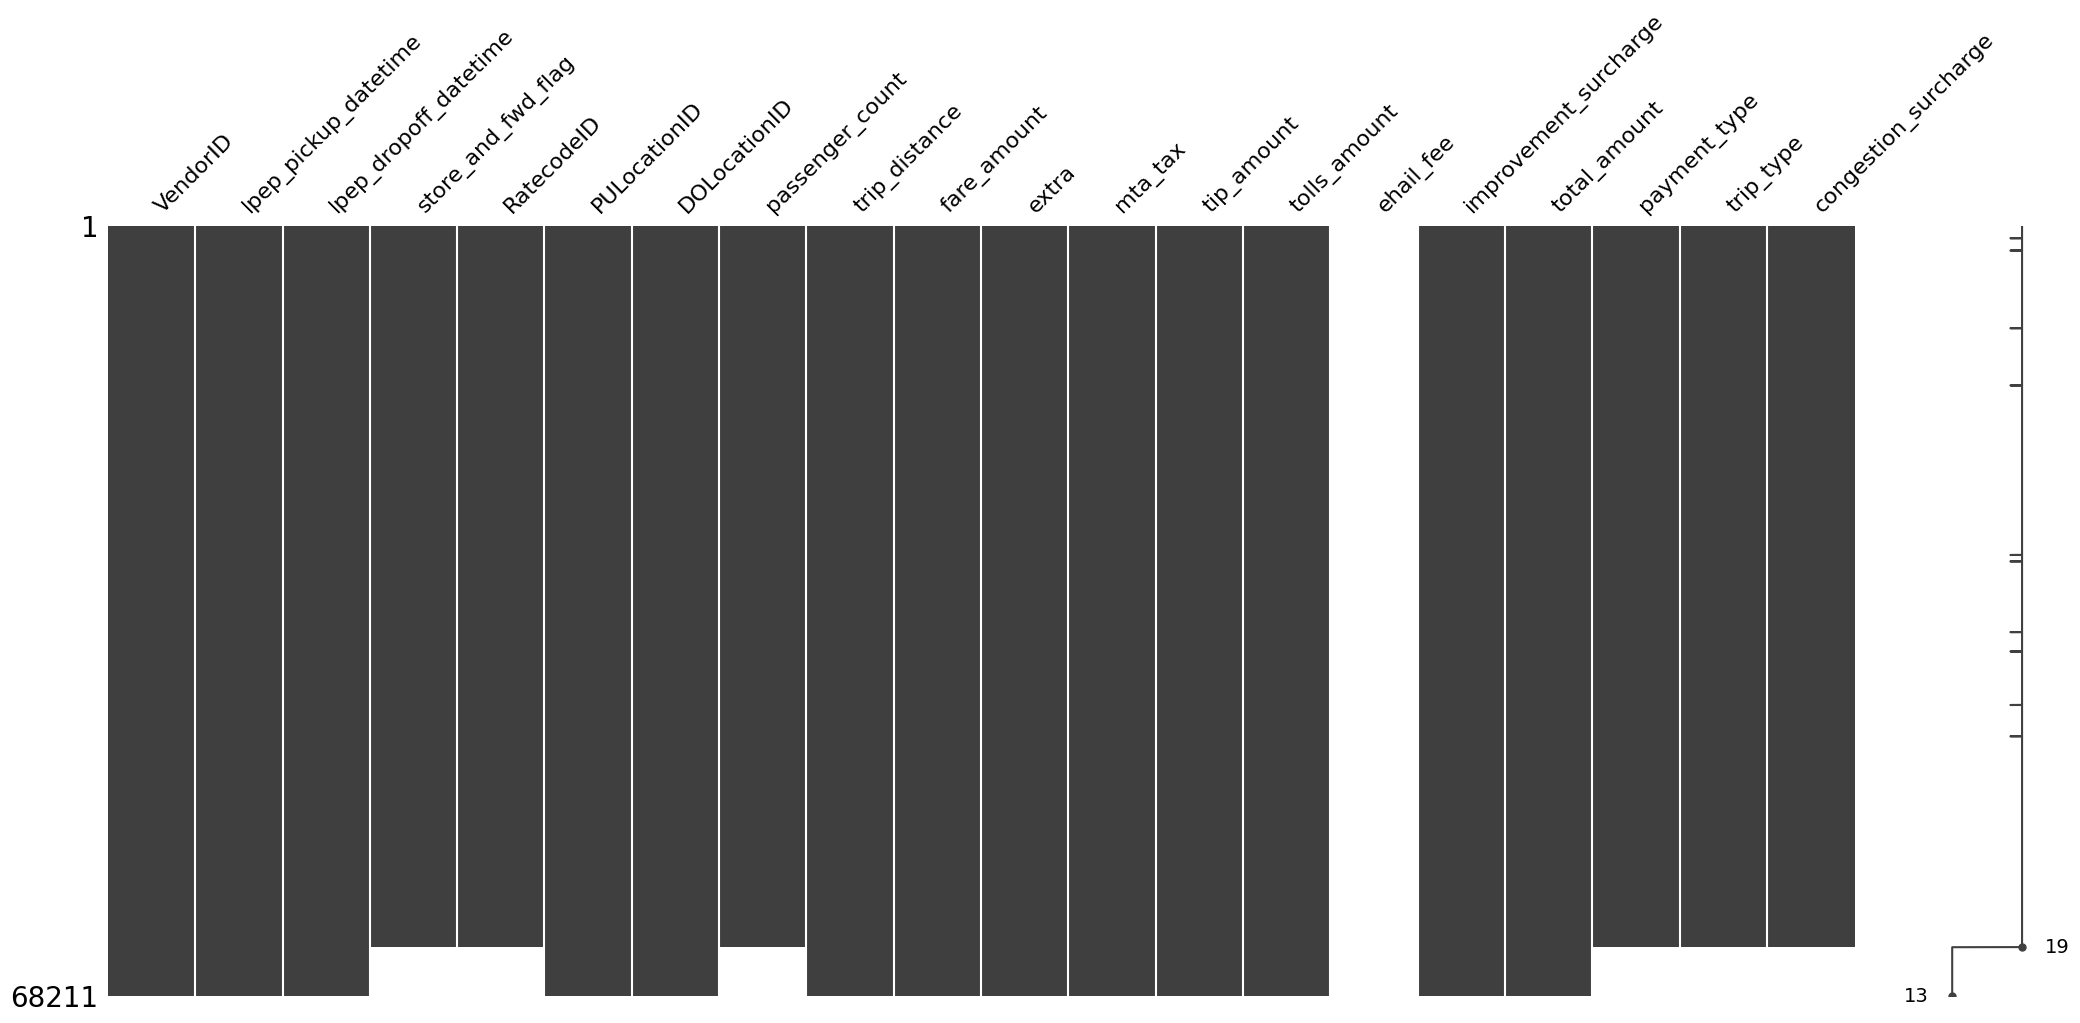

In [73]:
msn.matrix(df)

### Merubah Tipe Data

In [74]:
df["VendorID"] = df["VendorID"].astype('object')
df["RatecodeID"] = df["RatecodeID"].astype('object')
df["passenger_count"] = df["passenger_count"].astype('Int64')
df["PULocationID"] = df["PULocationID"].astype('object')
df["DOLocationID"] = df["DOLocationID"].astype('object')
df["payment_type"] = df["payment_type"].astype('object')
df["trip_type"] = df["trip_type"].astype('object')
df["lpep_pickup_datetime"] = df["lpep_pickup_datetime"].astype('datetime64[s]')
df["lpep_dropoff_datetime"] = df["lpep_dropoff_datetime"].astype('datetime64[s]')

### Mengganti nama columns

In [75]:
df = df.rename(
    columns={
        'lpep_pickup_datetime': 'Pickup_datetime', 
        'lpep_dropoff_datetime': 'Dropoff_datetime'
    }
)
df.columns

Index(['VendorID', 'Pickup_datetime', 'Dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype        
---  ------                 --------------  -----        
 0   VendorID               68211 non-null  object       
 1   Pickup_datetime        68211 non-null  datetime64[s]
 2   Dropoff_datetime       68211 non-null  datetime64[s]
 3   store_and_fwd_flag     63887 non-null  object       
 4   RatecodeID             63887 non-null  object       
 5   PULocationID           68211 non-null  object       
 6   DOLocationID           68211 non-null  object       
 7   passenger_count        63887 non-null  Int64        
 8   trip_distance          68211 non-null  float64      
 9   fare_amount            68211 non-null  float64      
 10  extra                  68211 non-null  float64      
 11  mta_tax                68211 non-null  float64      
 12  tip_amount             68211 non-null  float64      
 13  tolls_amount    

### Menambahkan Columns Durasi Perjalanan

In [77]:
df = df.assign(
    Durasi_perjalanan = lambda x: x.Dropoff_datetime - x.Pickup_datetime	
)

df.head()

,VendorID,Pickup_datetime,Dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Durasi_perjalanan
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1,2.58,14.9,...,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1,1.81,10.7,...,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1,0.00,7.2,...,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,0 days 00:06:20
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1,1.30,6.5,...,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1,1.10,6.0,...,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58


In [86]:
df['time_in_seconds'] = pd.to_timedelta(df['Durasi_perjalanan']).dt.total_seconds()

In [87]:
df.head()

,VendorID,Pickup_datetime,Dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Durasi_perjalanan,time_in_seconds
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01,661.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46,406.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,0 days 00:06:20,380.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49,349.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58,358.0


## Drop Columns

### Columns Ehailing

- Columns Ehailing merupakan columns ongkos aplikasi untuk kendaraan pribadi yang digunakan untuk transportasi umum.
  Berdasarkan penjelasan diatas, saya menyimpulkan bahwa kendaraan yang digunakan adalah kendaraan milik perusahaan taxi. Sehingga Columns Ehaling fee tidak diperlukan untuk analisis data 

### Columns store_and_fwd_flag
- Columns ini menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor. Columns
  ini tidak diperlukan dalam analisis data

In [78]:
df.drop(['ehail_fee'], axis=1, inplace= True)
df.drop(['store_and_fwd_flag'], axis=1, inplace= True)

### Menampilkan statistik deskriptif untuk data numerikal dan kategorikal 

In [79]:
display(df.describe(), df.describe(include='object'))

,Pickup_datetime,Dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Durasi_perjalanan
count,68211,68211,63887.0,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,63887.000000,68211
mean,2023-01-16 20:10:55,2023-01-16 20:29:01,1.31587,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,0.726748,0 days 00:18:05
min,2009-01-01 20:21:27,2009-01-02 11:07:31,0.0,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,-2.750000,0 days 00:00:00
25%,2023-01-09 11:59:47,2023-01-09 12:16:37,1.0,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,0.000000,0 days 00:07:13
50%,2023-01-17 08:40:42,2023-01-17 08:56:38,1.0,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,0.000000,0 days 00:11:24
75%,2023-01-24 15:52:30,2023-01-24 16:06:56,1.0,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.750000,0 days 00:17:29
max,2023-02-01 03:10:05,2023-02-01 17:27:05,9.0,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,2.750000,0 days 23:59:53
std,NaN,NaN,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,1.212836,0 days 01:14:55


,VendorID,RatecodeID,PULocationID,DOLocationID,payment_type,trip_type
count,68211,63887.0,68211,68211,63887.0,63877.0
unique,2,6.0,226,249,5.0,2.0
top,2,1.0,74,75,1.0,1.0
freq,58868,62103.0,13257,3524,40686.0,62476.0


## Insight
- Untuk mendapat keterangan Pick Up dan Drop Off ID diperluka data tambahan. Data tambahan dapat di download https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv

- Terdapat RatecodeID 99 yag tidak ada deskripsiya di pdf
- Meurut referensi mta_tax merupaka kelipatan 0.5 tapi didata terdapat 2.75 yang bukan kelipatan dari 0.5
- congestion_surcharge adalah tarif tambahan jika terjadi kemacetan senilai 2.75 sedangkan didata terdapat 2.5
- Terdapat data perjalanan diluar periode data. dataset ini merupaka dataset periode jauari2023
- Terdapat negative value 

In [80]:
df.query(" RatecodeID == 99 ")

,VendorID,Pickup_datetime,Dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Durasi_perjalanan
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,99.0,150,55,1,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0,0 days 00:14:17
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,99.0,73,82,1,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0,0 days 00:52:37
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,99.0,14,123,1,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0,0 days 02:12:56
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,99.0,61,77,1,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0,0 days 00:38:18
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,99.0,108,181,1,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0,0 days 00:45:56
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,99.0,150,123,1,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,0 days 04:19:03
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,99.0,90,68,1,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,0 days 00:09:20
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,99.0,265,123,1,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0,0 days 05:12:54
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,99.0,150,123,1,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,0 days 06:29:27
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,99.0,244,248,1,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0,0 days 09:51:31


#### Replace Congestion Surcharge
Congestion surcharge yang 2.5 dirubah ke 2.75

In [81]:
df.congestion_surcharge.replace({2.5:2.75}, inplace=True)

#### Replace Congestion Surcharge 
dilihat dari waktu pick up dan drop off maka row yang memiliki mta tax 2.75 dirubah menjadi 0

In [82]:
df.mta_tax.value_counts()

mta_tax
 0.50    53177
 1.50     9065
 0.00     5778
-0.50      165
 1.00       25
 2.75        1
Name: count, dtype: int64

In [83]:
df.query("mta_tax == 2.75")

,VendorID,Pickup_datetime,Dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Durasi_perjalanan
59336,1,2023-01-29 19:18:43,2023-01-29 19:19:02,1.0,97,97,1,0.0,0.0,0.0,2.75,0.0,0.0,0.0,2.75,1.0,1.0,0.0,0 days 00:00:19


In [84]:
df.mta_tax.replace({2.75:0}, inplace=True)
df.mta_tax.value_counts()

mta_tax
 0.5    53177
 1.5     9065
 0.0     5779
-0.5      165
 1.0       25
Name: count, dtype: int64

## Outlier

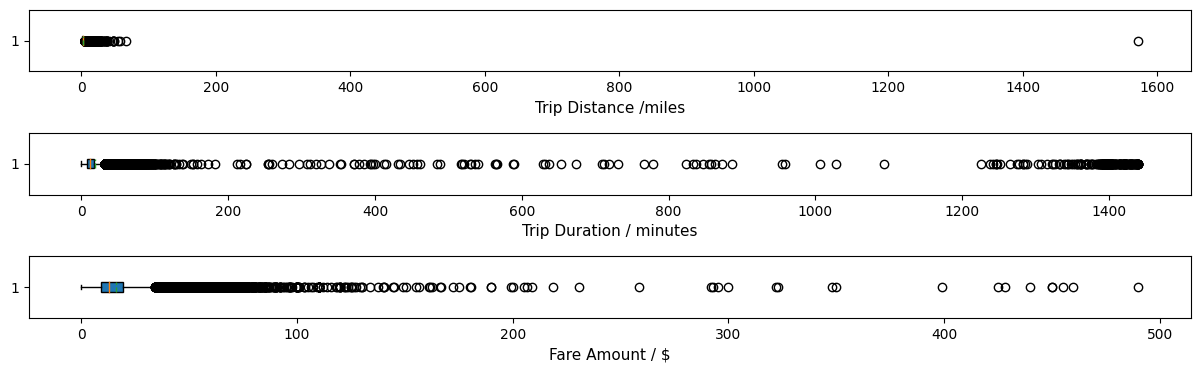

In [103]:
# exclude nan values
trip_distance = df.dropna().trip_distance
trip_duration = df.dropna().time_in_seconds.apply(lambda x: x/60)
fare_amount = df.dropna().fare_amount.apply(abs)

fig, axes = plt.subplots(3,figsize=(15, 4))
axes[0].boxplot(trip_distance, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[1].boxplot(trip_duration, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[2].boxplot(fare_amount, patch_artist=True, meanline=True, showmeans=True, vert=False)

axes[0].set_xlabel("Trip Distance /miles", fontsize=11)
axes[1].set_xlabel("Trip Duration / minutes", fontsize=11)
axes[2].set_xlabel("Fare Amount / $", fontsize=11)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=1)
plt.show()